15


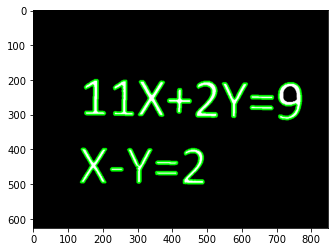

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt 

img = cv.imread('Equation_Image.jpeg', 0)
length, width = (img.shape)
for i in range(length):                                     #applying binarization
    for j in range(width):                                  #from the histogram, 100 seems like a good threshold
        if img[i][j] > 100:
            img[i][j] = 255
        else:
            img[i][j] = 0

import numpy as np


img_new = np.zeros((length, width), dtype='uint8')

for i in range(length):                                     #applying binarization
    for j in range(width):                                  #from the histogram, 100 seems like a good threshold
        if img[i][j] > 0:
            img_new[i][j] = 0
        else:
            img_new[i][j] = 255

img_without_box = img_new
contours, hierarchy = cv.findContours(img_new,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
print(len(contours))                                              # printing the total number of contours
img_3d = cv.cvtColor(img_new,cv.COLOR_GRAY2RGB)
cv.drawContours(img_3d, contours, -1, (0,255,0), 3)               # Drawing all the contours

plt.imshow(img_3d, cmap = 'Greys')

x,y,w,h = cv.boundingRect(contours[1])
im = cv.rectangle(img_new,(x,y),(x+w,y+h),(0,255,0),2)   #drawing the bounding rectangle for a random contour

(100, 60)


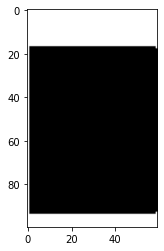

(100, 60)


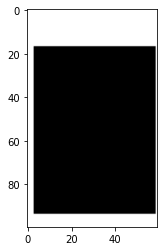

(100, 60)


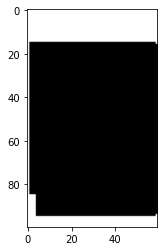

(100, 60)


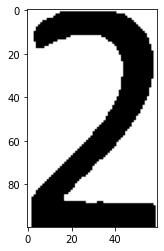

(100, 60)


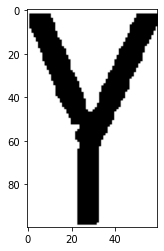

(100, 60)


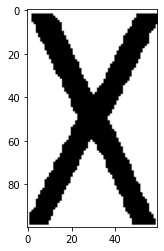

(100, 60)


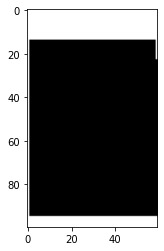

(100, 60)


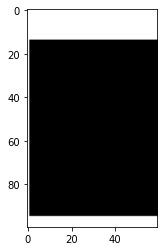

(100, 60)


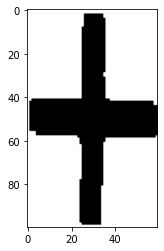

(100, 60)


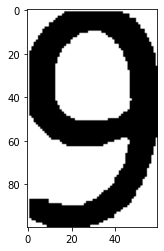

(100, 60)


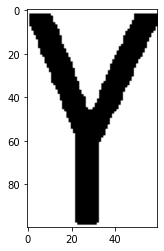

(100, 60)


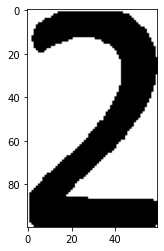

(100, 60)


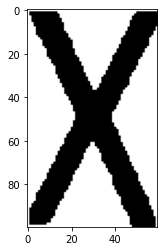

(100, 60)


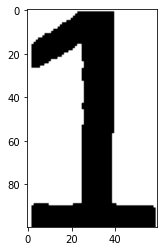

(100, 60)


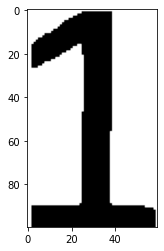

In [2]:
character = []
for i in range(0, len(contours)):
    x,y,w,h = cv.boundingRect(contours[i])                   #printing all the images of the bouding rectanges
    im = cv.rectangle(img_new,(x,y),(x+w,y+h),(0,255,0),2)
    im = img_without_box[y:y+h,x:x+w]
    im = cv.resize(im, (60,100))                                         # resizing to (60,100)
    length, width = (im.shape)
    print(im.shape)
    im_new = np.zeros((length, width), dtype='uint8')

    for i in range(length):                                     #applying binarization
        for j in range(width):                                  #from the histogram, 100 seems like a good threshold
            if im[i][j] > 0:
                im_new[i][j] = 255
            else:
                im_new[i][j] = 0


    character.append(im_new)
    
    plt.imshow(im_new, cmap = 'Greys')
    plt.show()

### We will try to make feature values for each characters, the intuition is given below 

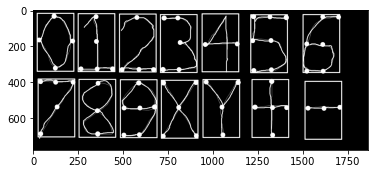

In [3]:
allchars = cv.imread('Features_of_the_characters.png', 0)

plt.imshow(allchars, cmap = 'Greys')
plt.show()

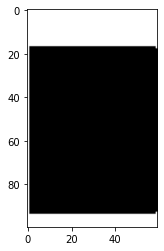

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1]


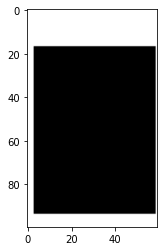

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1]


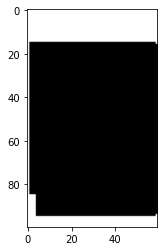

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1]


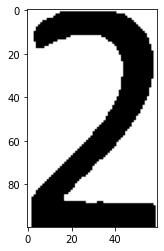

[0, 1, 0, 0, 0, 0, 1, 1, 1, 0]


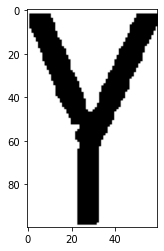

[1, 0, 1, 0, 1, 0, 0, 1, 0, 0]


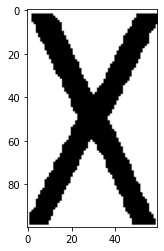

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]


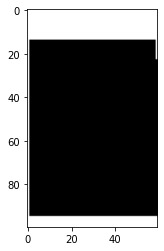

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1]


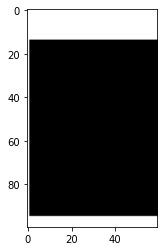

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1]


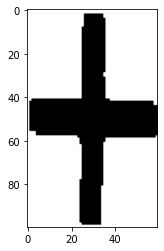

[0, 1, 0, 1, 1, 1, 0, 1, 0, 1]


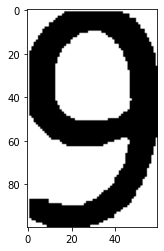

[0, 1, 0, 1, 1, 1, 1, 1, 0, 0]


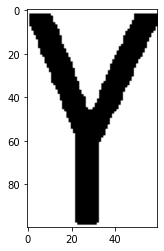

[1, 0, 1, 0, 1, 0, 0, 1, 0, 0]


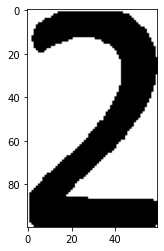

[1, 1, 0, 0, 0, 0, 1, 1, 1, 0]


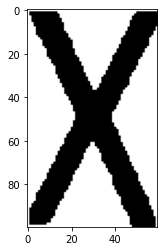

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]


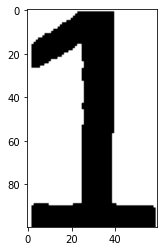

[0, 1, 0, 0, 1, 0, 1, 1, 1, 1]


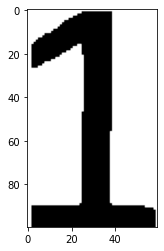

[0, 1, 0, 0, 1, 0, 1, 1, 1, 1]


In [4]:
feat_for_char = []
feature = []
feat = np.zeros(10, dtype='int32')

for p in range(0,len(contours)):
    char = character[p]
    segment1 = char[0:10,0:10]
    segment2 = char[0:10,25:35]
    segment3 = char[0:10,50:60]                         #finding features for images
    segment4 = char[45:55,0:10]
    segment5 = char[45:55,25:35]
    segment6 = char[45:55,50:60]
    segment7 = char[90:100,0:10]
    segment8 = char[90:100,25:35]
    segment9 = char[90:100,50:60]
    segment10 = char[20:30,25:35]
    segment = np.array((segment1,segment2,segment3,segment4,segment5,segment6,segment7,segment8,segment9,segment10))

    for n in range(0,10):
        count = 0
        for i in range(0,10):
            for j in range(0,10):
                if segment[n][i][j] == 0:
                    count +=1
        if count<75:
            feat[n] = 1
        feature.append(feat[n])

    feat_for_char.append(feature)
    plt.imshow(character[p], cmap = 'Greys')
    plt.show()
    print(feature)
    
    feature = []
    feat = np.zeros(10, dtype='int32')
    



### We shall hardcode the feature values to classify characters

In [5]:
num = 0
def classify(i):
    if (feat_for_char[i][0]==0 and feat_for_char[i][1]==0 and feat_for_char[i][2]==0):
        return "dash"
    
    if (feat_for_char[i][6] and feat_for_char[i][7] and feat_for_char[i][8]):
        if (feat_for_char[i][4]):
            return str(1)
        else:
            return str(2)

    if (feat_for_char[i][1] and feat_for_char[i][3] and feat_for_char[i][5] and feat_for_char[i][7]):
        if (feat_for_char[i][4] and feat_for_char[i][9]):
            return "+"
        else:
            if(feat_for_char[i][4]):
                return str(9)
            else:
                return str(0)
    
    if (feat_for_char[i][0] and feat_for_char[i][1]==0 and feat_for_char[i][2]):
        if (feat_for_char[i][7]):
            return "Y"
        else:
            return "X"
    
    if (feat_for_char[i][0] and feat_for_char[i][1] and feat_for_char[i][2]):
        if (feat_for_char[i][3]):
            return str(5)
        else:
            return str(7)
        
    if (feat_for_char[i][0]==0 and feat_for_char[i][1] and feat_for_char[i][2]==0):
        if (feat_for_char[i][3]):
            if(feat_for_char[i][6]):
                return str(9)
            else:
                return str(4)
        else:
            return str(8)
    
    if (feat_for_char[i][0]==1 and feat_for_char[i][1]==1 and feat_for_char[i][2]==0):
        return str(3)
    else:
        return str(6)
        

    
        
    
        
    
    



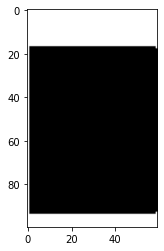

The character is: dash


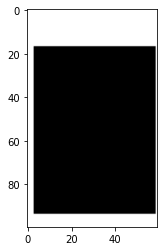

The character is: dash


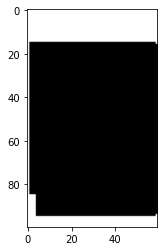

The character is: dash


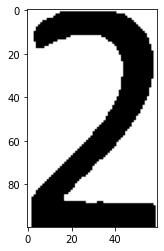

The character is: 2


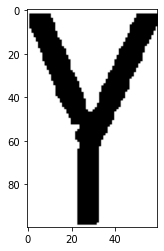

The character is: Y


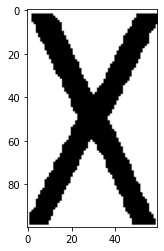

The character is: X


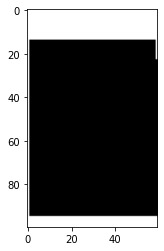

The character is: dash


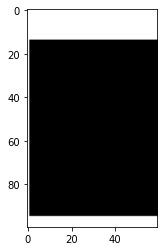

The character is: dash


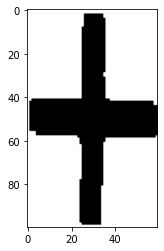

The character is: +


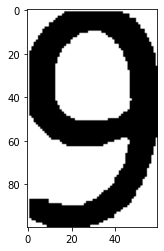

The character is: 9


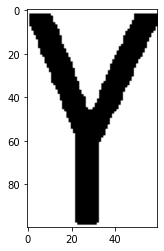

The character is: Y


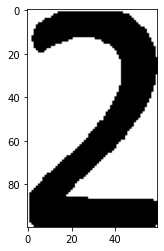

The character is: 2


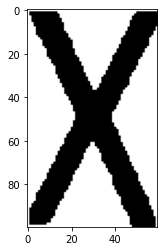

The character is: X


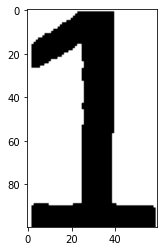

The character is: 1


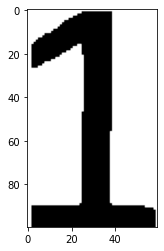

The character is: 1


In [6]:
for i in range(0,len(contours)):
    plt.imshow(character[i], cmap = 'Greys')
    plt.show()
    print("The character is: " + classify(i))         #print characters with classification
    
